Project 2

For this project we need to prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.

The model should predict the amount of gold extracted from gold ore. You have the extraction and purification data.

The model will help to optimize production and eliminate unprofitable parameters.

For the process that needs to be exectued on this project we need to:

* Prepare the data.
* Perform data analysis.
* Develop a model and train it.

Explanation:

First we need to understand how the company do the **flotation** and **purification** process in order to understand what we are looking for.

On the next image we can appreciate how the flow starts with the raw minerals set on the process, the first step is the "Flotation" process. 

The gold ore slurry is fed to the **flotation** plants to obtain a rougher gold concentrate and rougher tails (i.e. product residues with a low concentration of valuable metals).

The stability of this process is affected by the volatility and unfavorable physicochemical state of the **flotation** slurry (a mixture of solid particles and liquid).

Then we proceed to the "Puirification" process where:
The rougher concentrate undergoes two stages of **purification**. After this, we have the final concentrate and the new tails.

![Cleaning Process](cleaning_process.png)

Then we need to get the gold recovery of the process as in the next operation:

![Recovery](recovery.png)

With that in consideration we the finally need to do the next operation to get our sMAPE which will determine then how many particles of gold are in the extraction:

![sMAPE](smape.png)

![Final sMAPE](final-smape.png)

# 1. Preparing the data

## 1.1 Datas examination
In this section we will examine and preprocess the data to make it easy to work with on our future analysis.

In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy import stats as st

We contiune by adding our data into variables using pandas, this will create dataframes of our datasets.

In [301]:
df_train = pd.read_csv('./datasets/gold_recovery_train.csv')
df_test = pd.read_csv('./datasets/gold_recovery_test.csv')
df_full = pd.read_csv('./datasets/gold_recovery_full.csv')

Then we can start to contemplate how is our datasets looking and determine if we need to filter Nan, empty or duplicated values.

In [302]:
print(df_train.shape)
df_train.info()

(16860, 87)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-nu

In [303]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [304]:
print(df_test.shape)
df_test.head()

(5856, 53)


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [305]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [306]:
print(df_full.shape)
df_full.head()

(22716, 87)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [307]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [308]:
print('Total percentage of the train dataset:', round(len(df_train)*100/len(df_full), 2))
print('Total percentage of the test dataset:', round(len(df_test)*100/len(df_full),2))

Total percentage of the train dataset: 74.22
Total percentage of the test dataset: 25.78


### Recovery Operation

 To calculate the recovery we are going to create the function `recovery_calculation` that will take as arguments the name of the dataset and the stage from which the recovery will be calculated. In this case to calculate the recovery of the Rougher concentrate we will take into account the characteristics `rougher.output.concentrate_au`, `rougher.input.feed_au` and `'rougher.output.tail_au`; while to calculate the final concentrate we will consider the characteristics `final.output.concentrate_au`, `rougher.output.concentrate_au` and `final.output.tail_au`. From which the recovery will be calculated based on the formula presented above.

## 1.2 Test of rougher recovery by calculating the with the individual values

With the next function we will calculate if the way we obtain the recovery is the correct way of doing it by following the formula.

In [309]:
# C : rougher.output.concentrate_au
# F : rougher.input.feed_au
# T: rougher.output.tail_au

# Rougher recovery function
def recovery_calculation(df, stage = 'rougher'):
    # Checks the stage of the process
    # If the stage is rougher, it uses the rougher variables
    if stage == 'rougher':
        C =  df['rougher.output.concentrate_au']
        F =  df['rougher.input.feed_au']
        T =  df['rougher.output.tail_au']
    # If the stage is final, it uses the final variables
    elif stage == 'final':
        C = df['final.output.concentrate_au']
        F = df['rougher.output.concentrate_au']
        T = df['final.output.tail_au']
    # If the stage is not rougher or final, it returns NaN
    else:
        print('Indicar etapa adecuada (rougher o final)')
        return np.nan
    # Sets then numerator and denominator of the recovery formula
    numerador = C*(F-T)
    # The denominator is the same for both stages
    denominador = F*(C-T)
    # Calculates the recovery
    # The recovery is expressed in percentage, so we multiply by 100
    recovery = 100*(numerador/denominador)
    # Returns the recovery
    return recovery


In [310]:
# Rougher recovery calculation
# The rougher recovery is calculated using the rougher variables
rougher_data = df_train[['rougher.output.concentrate_au',
                         'rougher.input.feed_au',
                         'rougher.output.tail_au',
                         'rougher.output.recovery']].dropna()
rougher_recovery = recovery_calculation(rougher_data, 'rougher')

In [311]:
# Rougher recovery calculation
rougher_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

In [312]:
rougher_data.shape

(14287, 4)

On the next cell we estimate the Mean Absolute Error comparing the original rougher recovery column, with the one we created by using our function

In [313]:
mean_absolute_error(rougher_recovery, rougher_data['rougher.output.recovery'])

9.303415616264301e-15

As we can see, we get that our results are very accurate, since the difference between each all the values on both datasets are 0.00000000000000093 of difference, practically none!

## 1.3 What features does the test dataset contain?

In [314]:
# Obtain all the columns on full dataset
columnas_full = df_full.columns.values
# Obtain all the columns on test dataset
columnas_test = df_test.columns.values
# Check which columns are in the full dataset but not in the test dataset
missed_columns = set(columnas_full) - set(columnas_test)
missed_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

The reason why we do not have our "final" named columns is because these are the ones we want to let our model guess by itself, so we do not use them on our test dataset.

## 1.4 Data Processing

In [315]:
# Check if there are duplicates in the train dataset
df_train.duplicated().sum()

np.int64(0)

In [316]:
# Check if there are Nans in the train dataset
df_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [317]:
# Check if there are Nans in the test dataset
df_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In this occasion, we need to use a method that allows us to reeplace the empty values, with the last values that was on the timeline, this is because there is a heavy correlation between the values bbetween every hour on the dataset.

In [318]:
df_train = df_train.ffill()
df_test = df_test.ffill()

In [319]:
print(df_test.shape)
# Merge the test dataset with the full dataset
df_test = df_test.merge(df_full[['date','rougher.output.recovery', 'final.output.recovery']],
              how = 'left', on = 'date')
print(df_test.shape)

(5856, 53)
(5856, 55)


In [320]:
df_train = df_train[df_test.columns]
df_train.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430,68.347543
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794,66.927016


# 2. Data analysis

The minerals on the 
* Gold (Au)
* Silver (Ag)
* Lead (Pb)

## 2.1 Purification variance on each metal

In [321]:
# Function that graphics a boxplot of the mineral concentration in the different stages of the process
def boxplotMineral(mineral):
    columns = [f'rougher.input.feed_{mineral}',
              f'rougher.output.concentrate_{mineral}',
              f'primary_cleaner.output.concentrate_{mineral}',
              f'final.output.concentrate_{mineral}']

    concentrate = df_full[columns]

    plt.figure(figsize=(16,6.6))
    sns.boxplot(data=concentrate)
    plt.xlabel('Phase')
    plt.ylabel('Concentration')
    plt.show()

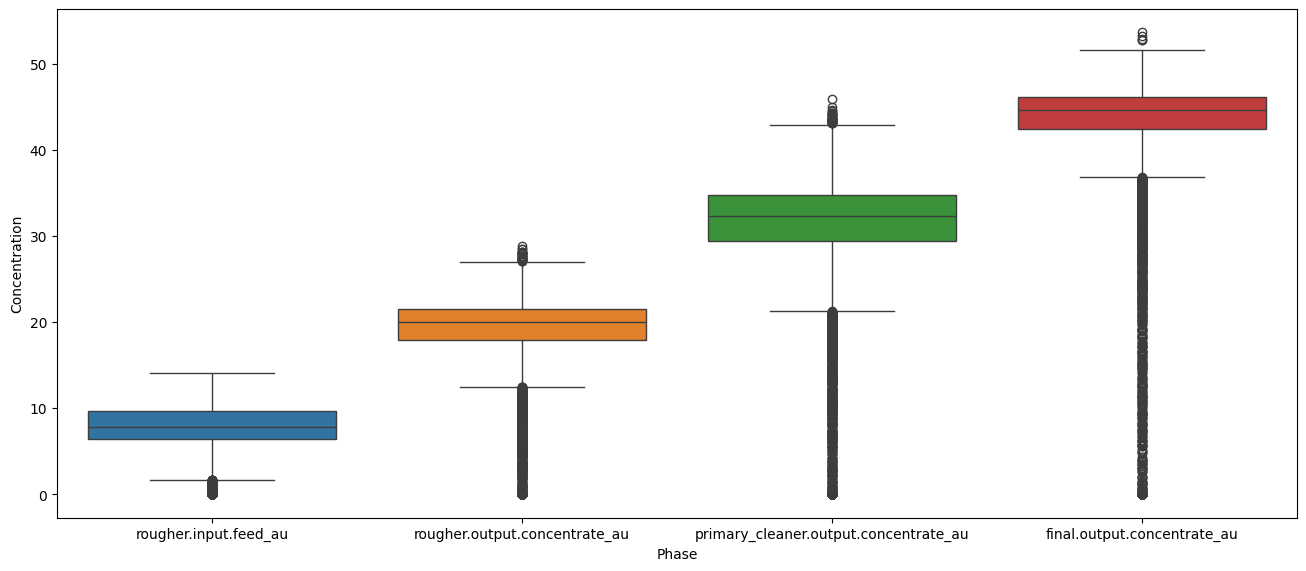

In [322]:
boxplotMineral("au")

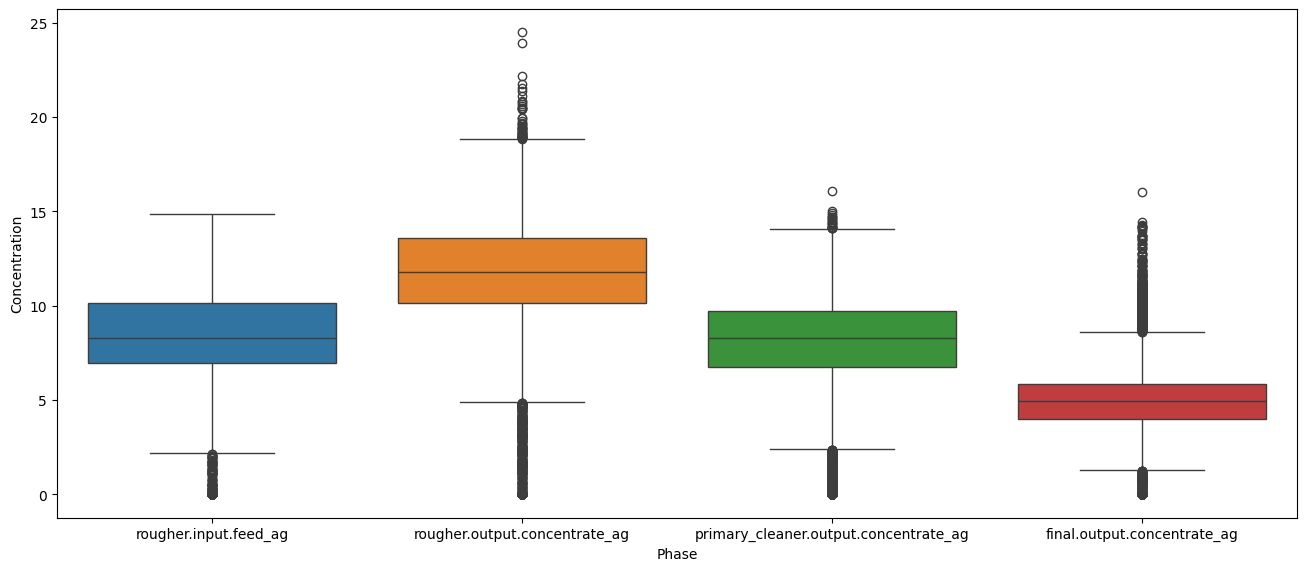

In [323]:
boxplotMineral("ag")

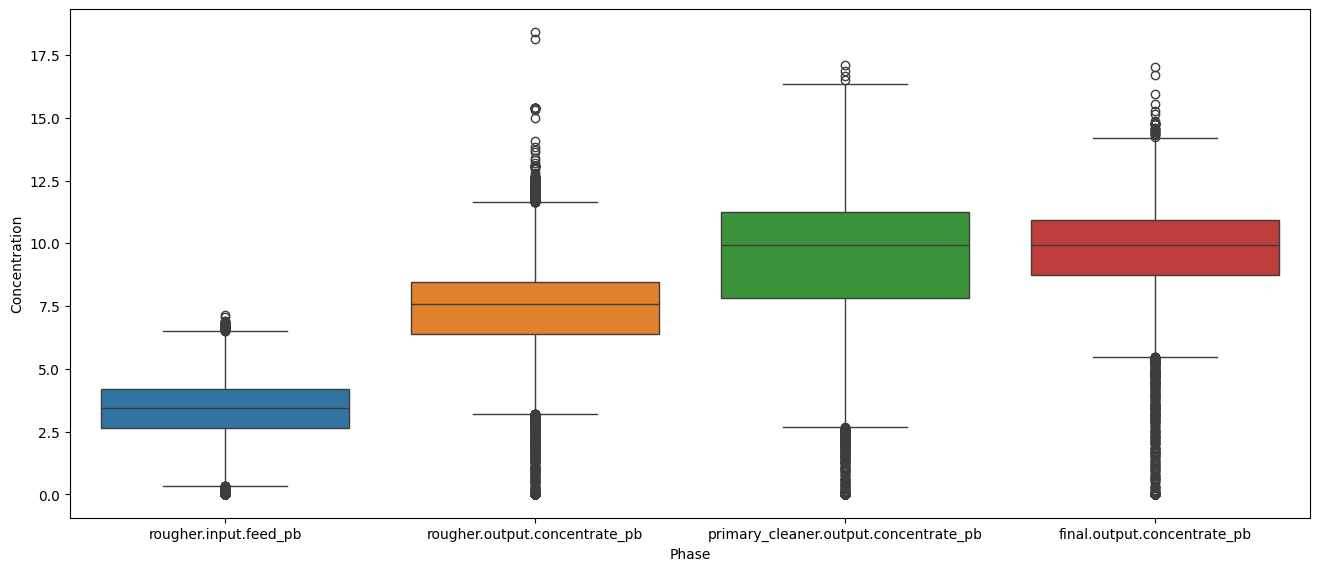

In [324]:
boxplotMineral("pb")

Analyzing the previous graphics we can notice that both Gold and Lead benefit for the flotation and purification stages, rising their numbers on every phase that passes. meanwhile, in the silver graphic we can observe, that once it passes the second phase, the concentration decreases and reaches a level, lower than when it started. This may be due to the cleaning and purification processes that are reflects a negative behaviour on getting silver at the end of the process.

## 2.2 Comparison of mineral distributions

Gold:

In [325]:
print(df_train["rougher.input.feed_au"].mean())
print(df_test["rougher.input.feed_au"].mean())

7.144278935938789
8.702055592956919


Silver:

In [326]:
print(df_train["rougher.input.feed_ag"].mean())
print(df_test["rougher.input.feed_ag"].mean())

7.8038252236229235
8.736407915080155


Lead:

In [327]:
print(df_train["rougher.input.feed_pb"].mean())
print(df_test["rougher.input.feed_pb"].mean())

3.1888025415710195
3.553990794226845


Total:

In [328]:
print(df_train["rougher.input.feed_size"].mean())
print(df_test["rougher.input.feed_size"].mean())

60.18859533601633
55.89886568885065


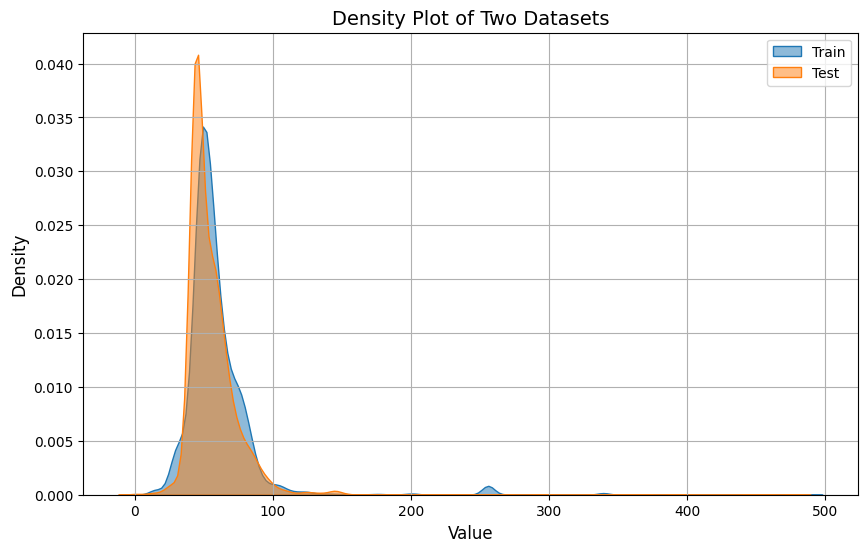

In [329]:
# Create a dataframe with the columns of interest
concentrate_train = df_train['rougher.input.feed_size']
concentrate_test = df_test['rougher.input.feed_size']

# Plot KDE for both
plt.figure(figsize=(10, 6))
sns.kdeplot(concentrate_train, label='Train', fill=True, alpha=0.5)
sns.kdeplot(concentrate_test, label='Test', fill=True, alpha=0.5)

# Customize plot
plt.title('Density Plot of Two Datasets', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

We can see by getting the mean of the particles on each feed, that the difference on each dataframe is very similar, so we can be sure that this will not affect our model by underfitting it with the given values.

## 2.3 Total concentrations of substances

In [330]:
# Set the concentrations of all phases
total_substances_feed = df_full[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']]
total_substances_concentrate = df_full[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']]
total_substances_final = df_full[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']]

In [331]:
# Function to plot the distribution of the concentrations of all phases
def fullSubstancesConcentration(df):
    for i in df.columns:
        # Calculate the mean and standard deviation of the concentration
        mean = df[i].mean()
        std = df[i].std()
        # Calculate the confidence interval
        confidence_interval = st.t.interval(confidence=.95, df= len(df[i])-1,loc=mean,scale=std)
        # Show the confidence interval
        print(f'{i} confidence interval: {confidence_interval[0]} - {confidence_interval[1]}')
    sns.histplot(df, kde=True, bins=30)
    plt.title('Feed Concentrations')
    plt.xlabel('Concentration')
    plt.ylabel('Density')
    plt.legend(df.columns)
    plt.show()

rougher.input.feed_au confidence interval: 1.6328016319193042 - 13.498873879327355
rougher.input.feed_ag confidence interval: 1.9400121698391297 - 14.191418519696153
rougher.input.feed_pb confidence interval: 0.469642173801736 - 6.141709447668041
rougher.input.feed_sol confidence interval: 10.746725502228834 - 55.80530717256314


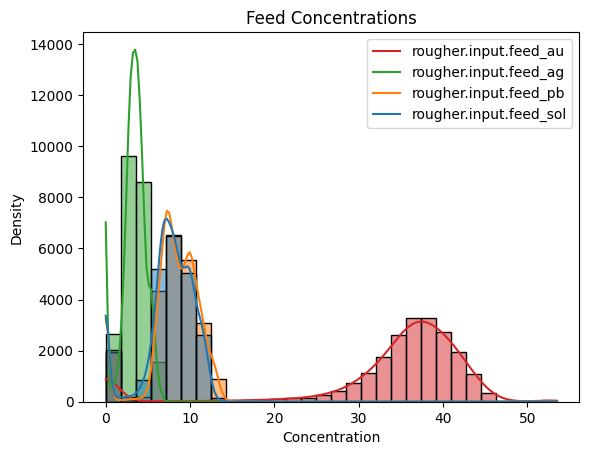

In [332]:
# Display all the concentrations of the phases and their confidence intervals
fullSubstancesConcentration(total_substances_feed)

rougher.output.concentrate_au confidence interval: 4.570454888363123 - 31.18862151770385
rougher.output.concentrate_ag confidence interval: 2.2934526883035478 - 19.45551480248735
rougher.output.concentrate_pb confidence interval: 1.3988355683164624 - 12.402456882186424
rougher.output.concentrate_sol confidence interval: 6.220179262754463 - 45.970837138266866


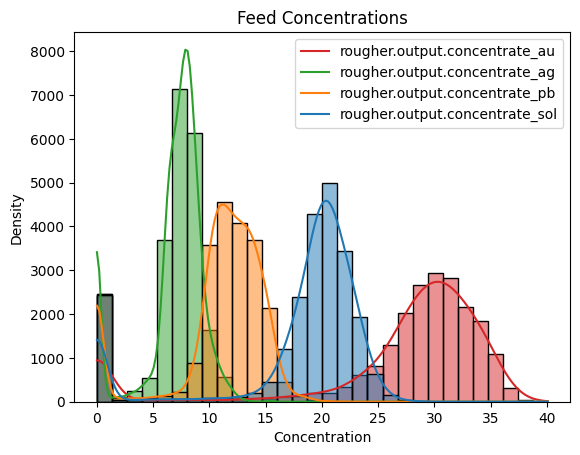

In [333]:
fullSubstancesConcentration(total_substances_concentrate)

final.output.concentrate_au confidence interval: 13.740053333457695 - 66.26229045855658
final.output.concentrate_ag confidence interval: 0.8023703848264438 - 8.760748518563723
final.output.concentrate_pb confidence interval: 2.762724774970458 - 15.427891435930075
final.output.concentrate_sol confidence interval: 1.221390220424479 - 16.059244275731185


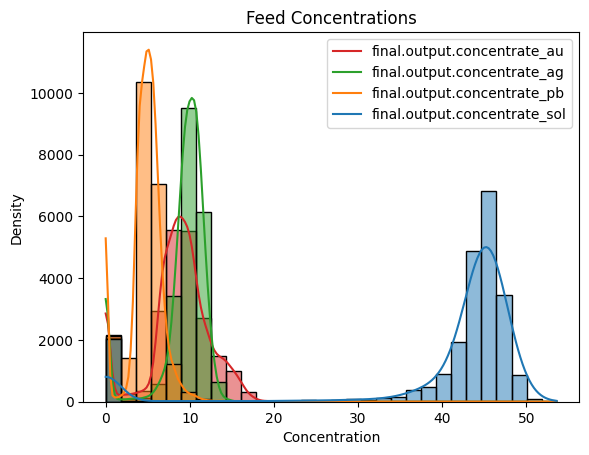

In [334]:
fullSubstancesConcentration(total_substances_final)

To get a better view of the values we have on our phases, we need to get rid of our outlier values that are inside every graphic. In this case our outliers are values that are less than 1. We will proceed by taking all the values less than 1 out of our scope.

In [335]:
# The outliers are eliminated by filtering the dataframe to keep only the values greater than 1
total_substances_feed_no_outliers = total_substances_feed[total_substances_feed.gt(1).all(axis=1)]
total_substances_concentrate_no_outliers = total_substances_concentrate[total_substances_concentrate.gt(1).all(axis=1)]
total_substances_final_no_outliers = total_substances_final[total_substances_final.gt(1).all(axis=1)]

rougher.input.feed_au confidence interval: 4.599235519452973 - 12.147546211471324
rougher.input.feed_ag confidence interval: 5.003753416999954 - 12.744761621800416
rougher.input.feed_pb confidence interval: 1.585101623760154 - 5.705205841594978
rougher.input.feed_sol confidence interval: 25.94523062475318 - 46.990425874337916


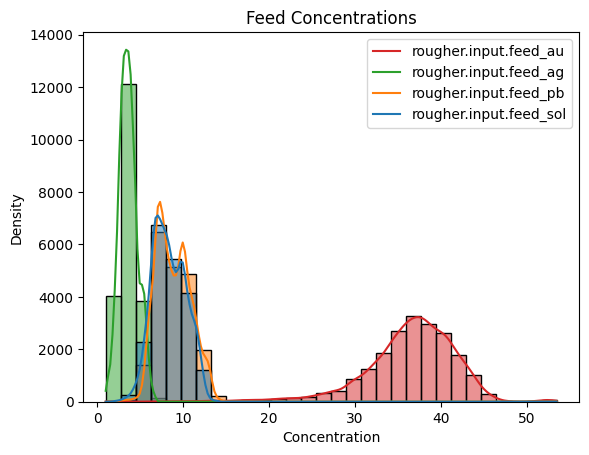

rougher.output.concentrate_au confidence interval: 14.586158307260204 - 25.585161179340282
rougher.output.concentrate_ag confidence interval: 7.730707095361594 - 16.70829296957298
rougher.output.concentrate_pb confidence interval: 4.7375587865102275 - 10.746041025881768
rougher.output.concentrate_sol confidence interval: 19.96232318259514 - 38.57818568859011


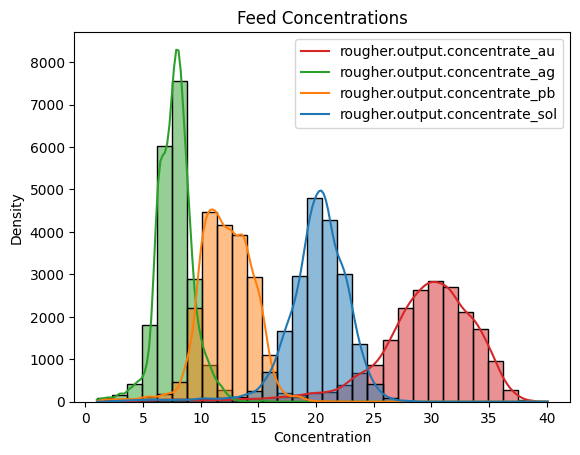

final.output.concentrate_au confidence interval: 35.32825769372499 - 52.8362830150417
final.output.concentrate_ag confidence interval: 2.5329537067044243 - 7.94156997515106
final.output.concentrate_pb confidence interval: 7.045100942439342 - 13.004201760105397
final.output.concentrate_sol confidence interval: 4.226975187408917 - 14.840925519390662


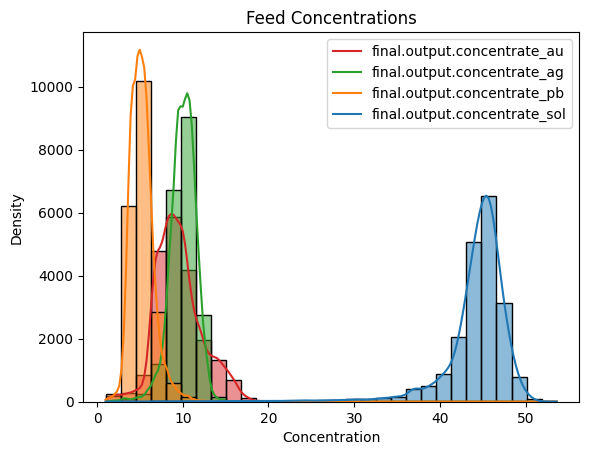

In [336]:
fullSubstancesConcentration(total_substances_feed_no_outliers)
fullSubstancesConcentration(total_substances_concentrate_no_outliers)
fullSubstancesConcentration(total_substances_final_no_outliers)

# 3. Machine Learning Model

For this section we will build our model and use the calculations expected for this analysis so our ML model can predict the values of the particles.

In [337]:
# Set our target that we want our model to predict
target = ['rougher.output.recovery', 'final.output.recovery']

In [338]:
# Set our training values for our model
y_train = df_train[target].reset_index(drop = True)
# Eliminate our target from our training dataset
X_train = df_train.drop(target, axis = 1)
# Eliminate the date from our training dataset
X_train = X_train.drop(['date'], axis = 1)

In [339]:
# Return the sMAPE calculation
def compute_smape(y, y_pred):
    n = len(y)
    real = abs(y)
    pred = abs(y_pred)
    diff = abs(y - y_pred)
    # sMAPE formula
    smape =  (1/n)*np.sum(diff /((real + pred)/2))*100
    return smape

# Return the sMAPE final calculation
def smape_final(y, y_pred):

    y_rougher = y.iloc[:,0]
    y_pred_rougher = y_pred[:,0]

    y_final = y.iloc[:,1]
    y_pred_final = y_pred[:,1]

    smape_rougher = compute_smape(y_rougher, y_pred_rougher)
    smape_final = compute_smape(y_final, y_pred_final)

    return (0.25*smape_rougher + 0.75*smape_final)

smape_scorer = make_scorer(smape_final)

### Linear Regression Model

In [340]:
# Creates the model
lr_model = LinearRegression()
# Fits the model to the training data and uses the smape function as the scoring method
lr_score = cross_val_score(lr_model, X_train, y_train, scoring=smape_scorer, cv = 5)
# Calculates the mean of the sMAPE score
lr_final_score = lr_score.mean()

print('sMAPE score on each iteration:', lr_score)
print('Linear Regression Model | sMAPE = {:.6f}'.format(lr_final_score))

sMAPE score on each iteration: [17.86800384 13.05000993 15.84610413 20.683037   17.39571145]
Linear Regression Model | sMAPE = 16.968573


### Random Forest Model

In [342]:

for depth in np.arange(1,5):
    # Create the Random Forest model with specific depth and number of estimators
    rf_model = RandomForestRegressor(
        n_estimators=100,   # number of trees in the forest
        max_depth=depth,       # maximum depth of each tree
        random_state=12345,  # for reproducibility
    )

    # Evaluate model using cross-validation with your sMAPE scorer
    rf_score = cross_val_score(rf_model, X_train, y_train, scoring=smape_scorer, cv=5)

    # Calculate the average score
    rf_final_score = rf_score.mean()

    # Display the scores
    print('sMAPE score on each iteration:', rf_score)
    print('Random Forest Model (depth=10, estimators=100) | sMAPE = {:.6f}'.format(rf_final_score))

sMAPE score on each iteration: [13.71054618 12.72501643 13.47610872 21.45727247 16.24679739]
Random Forest Model (depth=10, estimators=100) | sMAPE = 15.523148
sMAPE score on each iteration: [13.61786326 12.81625703 13.34123747 20.61401064 15.21712744]
Random Forest Model (depth=10, estimators=100) | sMAPE = 15.121299
sMAPE score on each iteration: [13.54815231 11.36176225 13.33598909 20.32272214 15.22028795]
Random Forest Model (depth=10, estimators=100) | sMAPE = 14.757783
sMAPE score on each iteration: [13.18727126 11.98455962 14.43190135 20.33071083 15.36181299]
Random Forest Model (depth=10, estimators=100) | sMAPE = 15.059251
